# Visualise skills coreness
Felix Zaussinger | 28.07.2021

## Core Analysis Goal(s)
1.

## Key Insight(s)
1.

**Kanders et al. 2020**:

We tested the impact of upskilling for 100 ESCO skills, which we named
‘core skills’ due to their special relationships with the other skills. The
core skills were identified by constructing a graph where each node is an ESCO
skill, and a pair of skills was connected if they happen to be used in the same
occupation (as either, an optional or essential skill). For each node, we
derived a measure of node ‘coreness’ (ki) by combining three widely used metrics
from graph theory: betweenness centrality (bi), eigenvector centrality (ei) and
the clustering coefficient (ci). T

The coreness measure of a skill will be high if the skill is connected to
diverse sets of skills that are weakly connected to each other (the latter is
ensured by the use of the clustering coefficient, which measures whether the
neighbours of the node are also connected themselves).

In [1]:
import os
import sys
import logging
from pathlib import Path

import numpy as np
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("ticks")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

Define directory structure

In [2]:
# project directory
abspath = os.path.abspath('')
project_dir = str(Path(abspath).parents[0])

# sub-directories
data_raw = os.path.join(project_dir, "data", "raw")
data_interim = os.path.join(project_dir, "data", "interim")
data_processed = os.path.join(project_dir, "data", "processed")
figure_dir = os.path.join(project_dir, "reports", "figures")

Data

In [5]:
coreness = pd.read_csv(
    os.path.join(
        data_raw, "mcc_data", "interim", "upskilling_analysis",
        "skills_coreness_measure.csv"
    ),
    index_col=0
)

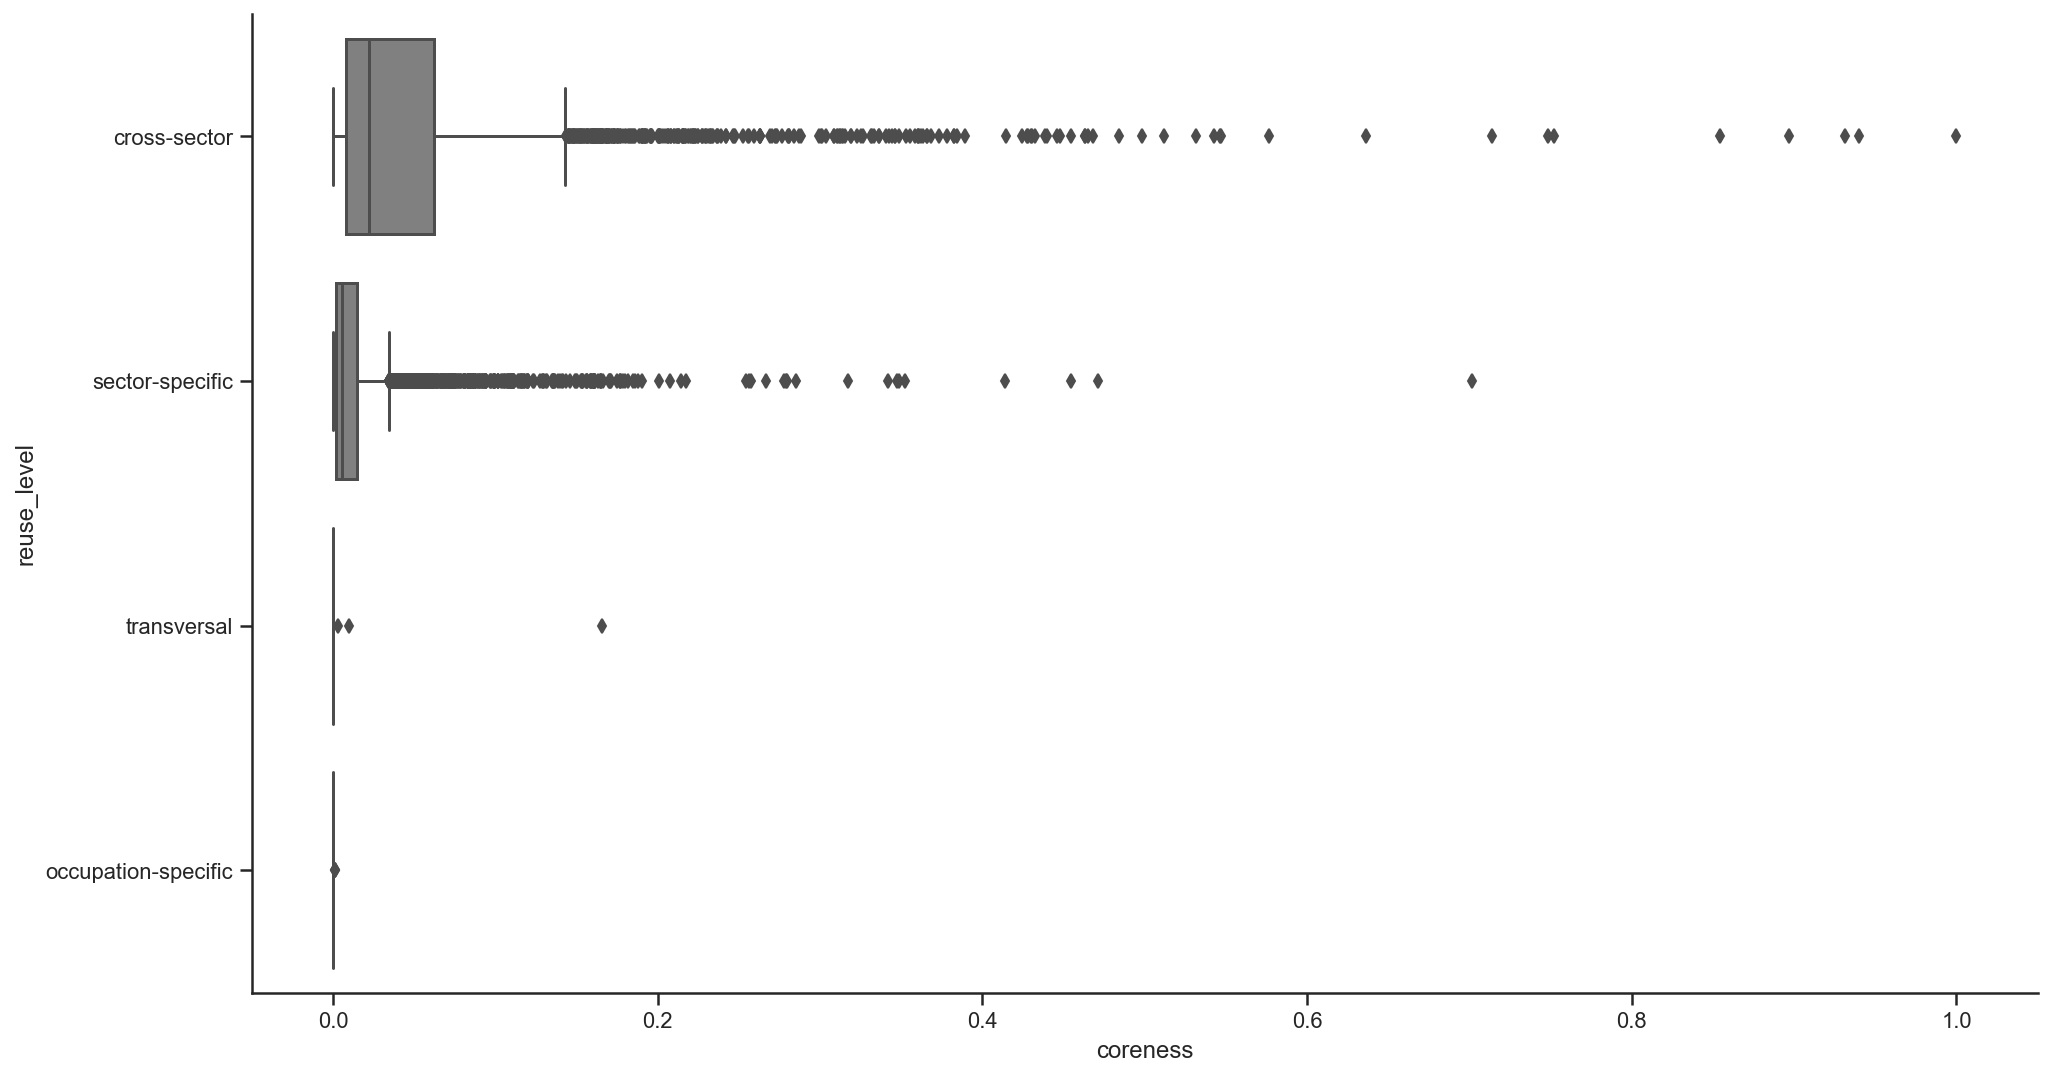

In [36]:
sns.boxplot(
    data=coreness,
    y="reuse_level",
    x="coreness",
    orient="h",
    color="grey",
    order=coreness.groupby("reuse_level").mean().sort_values("coreness", ascending=False).index.values
)

sns.despine()

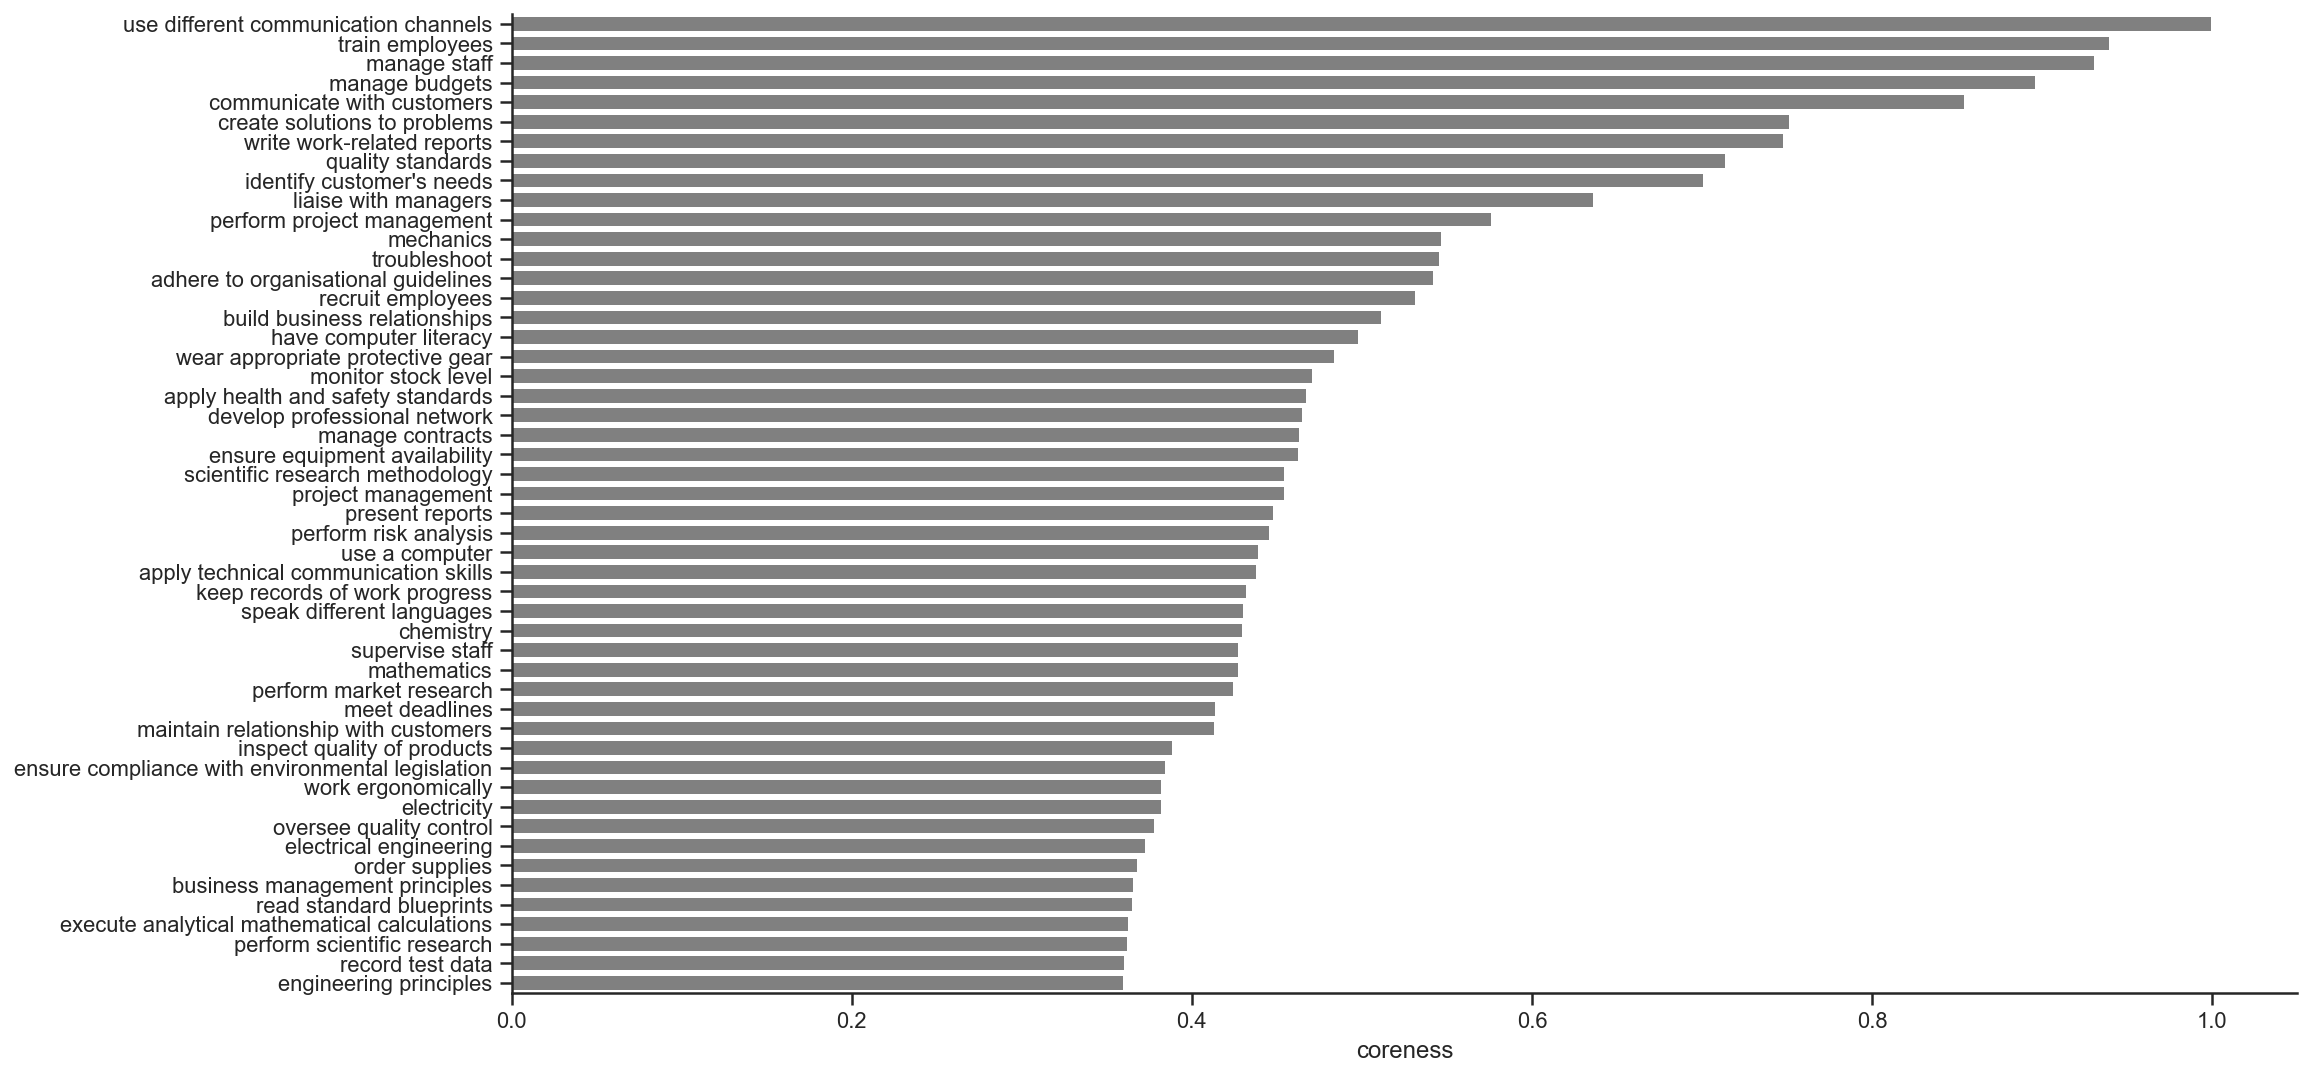

In [35]:


ax = sns.barplot(
    data=coreness.sort_values("coreness", ascending=False).head(50),
    y="preferred_label",
    x="coreness",
    orient="h",
    color="grey",
)

ax.set_ylabel(None)
sns.despine()